In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

sns.set_context('talk')

# 1. Business Understanding

Data mining objectives:
- identify key features that are associated with cancelled bookings
- create a model to predict booking cancellation

Aim: $\geq$ 80% accuracy

# 2. Data Understanding

## 2.1. Data Collection

Source: [hotel demand datasets](https://ars.els-cdn.com/content/image/1-s2.0-S2352340918315191-mmc2.zip) from Antonio, et al. (2019).

Paper: Antonio, N., De Almeida, A., & Nunes, L. (2019). Hotel booking demand datasets. Data in Brief, 22, 41-49. https://doi.org/10.1016/j.dib.2018.11.126

## 2.2. Data Description

In [2]:
df_h1 = pd.read_csv("H1.csv")
df_h2 = pd.read_csv("H2.csv")

In [3]:
df_h1.iloc[0]

IsCanceled                                    0
LeadTime                                    342
ArrivalDateYear                            2015
ArrivalDateMonth                           July
ArrivalDateWeekNumber                        27
ArrivalDateDayOfMonth                         1
StaysInWeekendNights                          0
StaysInWeekNights                             0
Adults                                        2
Children                                      0
Babies                                        0
Meal                                  BB       
Country                                     PRT
MarketSegment                            Direct
DistributionChannel                      Direct
IsRepeatedGuest                               0
PreviousCancellations                         0
PreviousBookingsNotCanceled                   0
ReservedRoomType               C               
AssignedRoomType               C               
BookingChanges                          

In [4]:
excluded_cols = [
    'IsCanceled','ArrivalDateYear','ArrivalDateWeekNumber',
    'ArrivalDateDayOfMonth','IsRepeatedGuest','BookingChanges'
]
selected_cols = df_h1._get_numeric_data().columns.drop(labels = excluded_cols)

display(df_h1[selected_cols].describe())
display(df_h2[selected_cols].describe())

,LeadTime,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,PreviousCancellations,PreviousBookingsNotCanceled,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
count,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.000000,40060.00000
mean,92.675686,1.189815,3.128732,1.867149,0.128682,0.013904,0.101722,0.146455,0.527758,94.952930,0.138068,0.61977
std,97.285315,1.147812,2.461329,0.697285,0.445195,0.118998,1.335115,1.001955,7.428580,61.442418,0.351001,0.81393
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.00000
25%,10.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.00000
50%,57.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,75.000000,0.000000,0.00000
75%,155.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,125.000000,0.000000,1.00000
max,737.000000,19.000000,50.000000,55.000000,10.000000,2.000000,26.000000,30.000000,185.000000,508.000000,8.000000,5.00000


,LeadTime,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,PreviousCancellations,PreviousBookingsNotCanceled,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
count,79330.000000,79330.000000,79330.000000,79330.000000,79326.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000,79330.000000
mean,109.735724,0.795185,2.182957,1.850977,0.091370,0.004941,0.079743,0.132371,3.226774,105.304465,0.024367,0.546918
std,110.948526,0.885026,1.456416,0.509292,0.372177,0.084323,0.415472,1.693411,20.870890,43.602954,0.154919,0.780776
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,79.200000,0.000000,0.000000
50%,74.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,99.900000,0.000000,0.000000
75%,163.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,629.000000,16.000000,41.000000,4.000000,3.000000,10.000000,21.000000,72.000000,391.000000,5400.000000,3.000000,5.000000


## 2.3. Data Exploration

### Distribution by reservation status

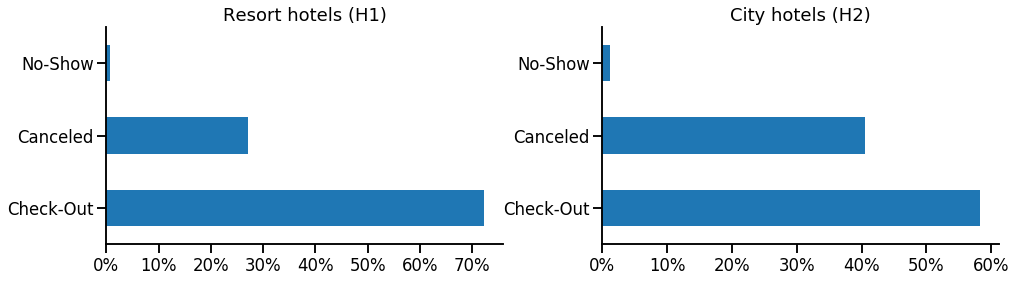

In [5]:
f, ax = plt.subplots(figsize = (16, 4), ncols = 2)
plt.subplots_adjust(wspace = .25)

df_h1['ReservationStatus'].value_counts(True).plot.barh(ax = ax[0]);
df_h2['ReservationStatus'].value_counts(True).plot.barh(ax = ax[1]);

ax[0].set_title('Resort hotels (H1)')
ax[0].xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

ax[1].set_title('City hotels (H2)')
ax[1].xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
sns.despine();
plt.show();

### Distribution by country

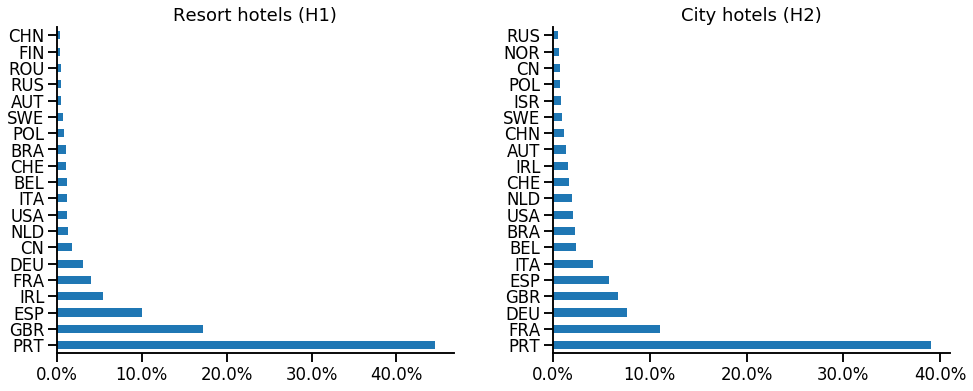

In [6]:
f, ax = plt.subplots(figsize = (16, 6), ncols = 2)
plt.subplots_adjust(wspace = .25)

n = 20
df_h1['Country'].value_counts(True).head(n).plot.barh(ax = ax[0]);
df_h2['Country'].value_counts(True).head(n).plot.barh(ax = ax[1]);

ax[0].set_title('Resort hotels (H1)')
ax[0].xaxis.set_major_formatter(mtick.PercentFormatter(1.0))

ax[1].set_title('City hotels (H2)')
ax[1].xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
sns.despine();
plt.show();

### Cancelled bookings by week of year

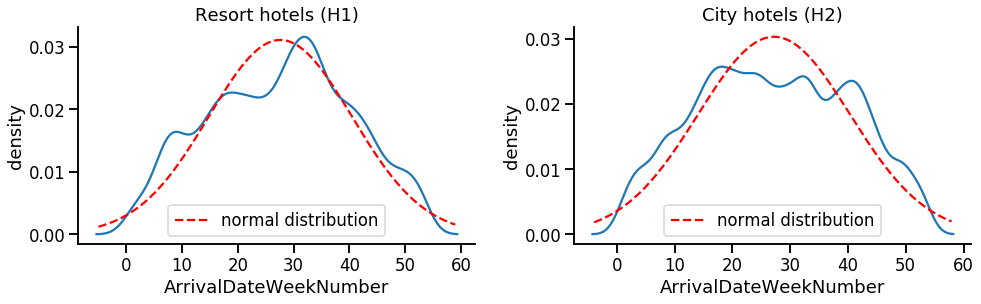

In [7]:
from scipy.stats import norm

mask_h1_cancel = (df_h1['IsCanceled'] == 1)
mask_h2_cancel = (df_h2['IsCanceled'] == 1)

f, ax = plt.subplots(figsize = (16,4), ncols = 2)
plt.subplots_adjust(wspace = .25)

sns.distplot(
    df_h1[mask_h1_cancel]['ArrivalDateWeekNumber'],
#     kde = False,
    hist = False,
    fit = norm,
    fit_kws = {'color': 'red', 'linestyle': 'dashed', 'label': 'normal distribution'},
    ax = ax[0]
);

sns.distplot(
    df_h2[mask_h2_cancel]['ArrivalDateWeekNumber'],
#     kde = False,
    hist = False,
    fit = norm,
    fit_kws = {'color': 'red', 'linestyle': 'dashed', 'label': 'normal distribution'},
    ax = ax[1]
);

# ax[0].set_title('Cancelled bookings in resort hotels (H1) by week of year')
# ax[1].set_title('Cancelled bookings in city hotels (H2) by week of year')
ax[0].set_title("Resort hotels (H1)")
ax[1].set_title("City hotels (H2)")
ax[0].set_ylabel('density')
ax[1].set_ylabel('density')
ax[0].legend(loc = 'best')
ax[1].legend(loc = 'best')
sns.despine();

### Cancelled bookings by day of month

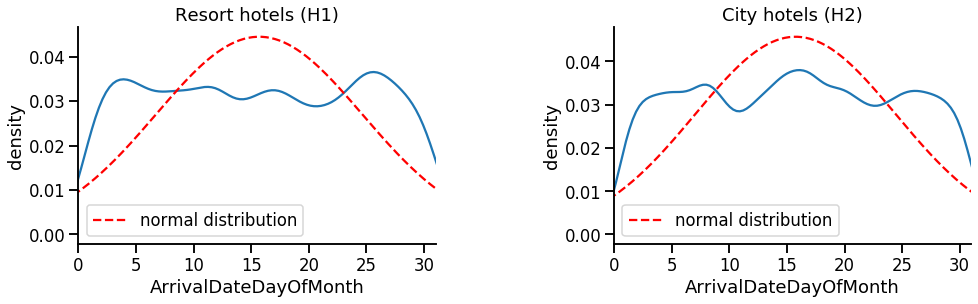

In [8]:
from scipy.stats import norm

mask_h1_cancel = (df_h1['IsCanceled'] == 1)
mask_h2_cancel = (df_h2['IsCanceled'] == 1)

f, ax = plt.subplots(figsize = (16,4), ncols = 2)
plt.subplots_adjust(wspace = .5)

sns.distplot(
    df_h1[mask_h1_cancel]['ArrivalDateDayOfMonth'],
#     kde = False,
    hist = False,
    fit = norm,
    fit_kws = {'color': 'red', 'linestyle': 'dashed', 'label': 'normal distribution'},
    ax = ax[0]
);

sns.distplot(
    df_h2[mask_h2_cancel]['ArrivalDateDayOfMonth'],
#     kde = False,
    hist = False,
    fit = norm,
    fit_kws = {'color': 'red', 'linestyle': 'dashed', 'label': 'normal distribution'},
    ax = ax[1]
);

# ax[0].set_title('Cancelled bookings in resort hotels (H1) by day of month')
# ax[1].set_title('Cancelled bookings in city hotels (H2) by day of month')
ax[0].set_xlim(0,31)
ax[1].set_xlim(0,31)

ax[0].set_title("Resort hotels (H1)")
ax[1].set_title("City hotels (H2)")
ax[0].set_ylabel('density')
ax[1].set_ylabel('density')
ax[0].legend(loc = 'best')
ax[1].legend(loc = 'best')
sns.despine();

### ADR 

#### ADR based on cancellation status

H2 dataset has a record with extremely high ADR.

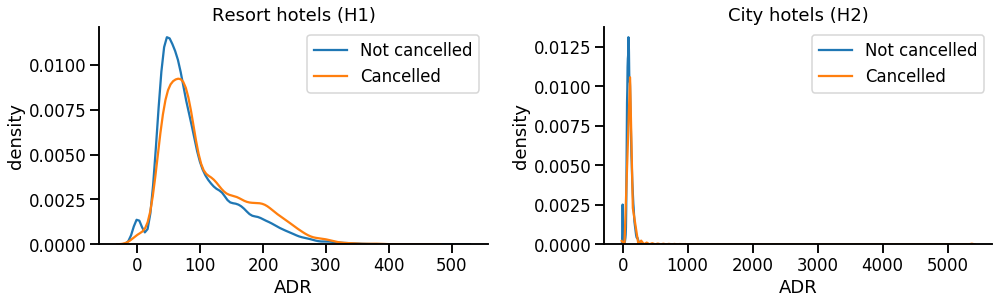

In [9]:
f, ax = plt.subplots(figsize = (16,4), ncols = 2)
plt.subplots_adjust(wspace = .3)

for flag in df_h1['IsCanceled'].unique():
    mask = (df_h1['IsCanceled'] == flag)
    if (flag):
        label_text = "Cancelled"
    else:
        label_text = "Not cancelled"
        
    sns.distplot(
        df_h1[mask]['ADR'],
        hist = False,
        label = label_text,
        ax = ax[0]
    )

ax[0].legend(loc = 'best')
ax[0].set_ylabel("density")
ax[0].set_title("Resort hotels (H1)")
    
for flag in df_h2['IsCanceled'].unique():
    mask = (df_h2['IsCanceled'] == flag)
    if (flag):
        label_text = "Cancelled"
    else:
        label_text = "Not cancelled"
        
    sns.distplot(
        df_h2[mask]['ADR'],
        hist = False,
        label = label_text,
        ax = ax[1]
    )

ax[1].legend(loc = 'best')
ax[1].set_ylabel("density")
ax[1].set_title("City hotels (H2)")
sns.despine();

#### ADR by distribution channel

The outliers is found on TA/TO distribution channel.

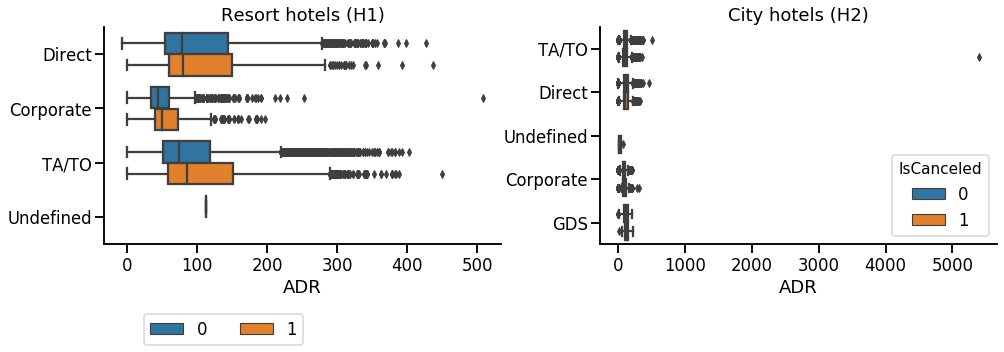

In [10]:
f, ax = plt.subplots(figsize = (16, 4), ncols = 2)
plt.subplots_adjust(wspace = .25)

sns.boxplot(
    data = df_h1,
    x = 'ADR',
    y = 'DistributionChannel',
    hue = 'IsCanceled',
    orient = 'h',
    ax = ax[0]
)
ax[0].set_title('Resort hotels (H1)')
ax[0].set_ylabel('')
ax[0].legend(loc = 'lower center', bbox_to_anchor = [0.3,-.5], ncol = 2)

sns.boxplot(
    data = df_h2,
    x = 'ADR',
    y = 'DistributionChannel',
    hue = 'IsCanceled',
    orient = 'h',
#     showfliers = False,
    ax = ax[1]
)

ax[1].set_title('City hotels (H2)')
ax[1].set_ylabel('')
sns.despine();

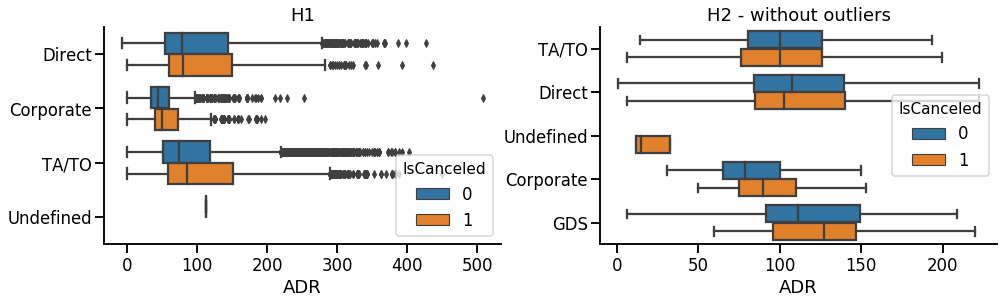

In [11]:
f, ax = plt.subplots(figsize = (16, 4), ncols = 2)
plt.subplots_adjust(wspace = .25)

sns.boxplot(
    data = df_h1,
    x = 'ADR',
    y = 'DistributionChannel',
    hue = 'IsCanceled',
    orient = 'h',
#     palette = 'Set1',
    ax = ax[0]
)
ax[0].set_title('H1')
ax[0].set_ylabel('')


sns.boxplot(
    data = df_h2,
    x = 'ADR',
    y = 'DistributionChannel',
    hue = 'IsCanceled',
    orient = 'h',
#     palette = 'Set1',
    showfliers = False,
    ax = ax[1]
)

ax[1].set_title('H2 - without outliers')
ax[1].set_ylabel('')
sns.despine();

### Lead Time

#### Lead Time by Cancellation Status

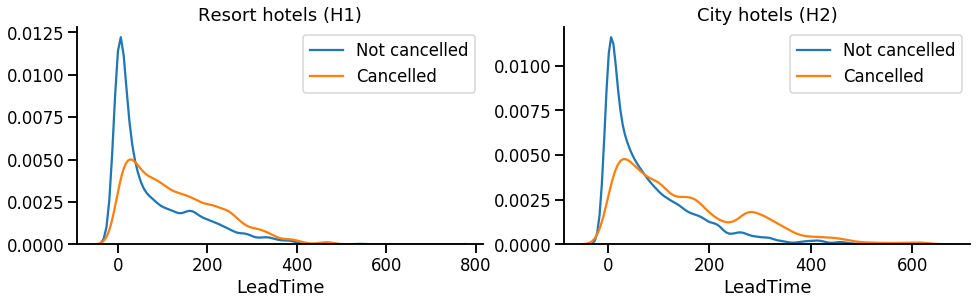

In [12]:
f, ax = plt.subplots(figsize = (16,4), ncols = 2)

for flag in df_h1['IsCanceled'].unique():
    mask = (df_h1['IsCanceled'] == flag)
    if (flag):
        label_text = "Cancelled"
    else:
        label_text = "Not cancelled"
        
    sns.distplot(
        df_h1[mask]['LeadTime'],
        hist = False,
        label = label_text,
        ax = ax[0]
    )

ax[0].legend(loc = 'best')
ax[0].set_title("Resort hotels (H1)")
    
for flag in df_h2['IsCanceled'].unique():
    mask = (df_h2['IsCanceled'] == flag)
    if (flag):
        label_text = "Cancelled"
    else:
        label_text = "Not cancelled"
        
    sns.distplot(
        df_h2[mask]['LeadTime'],
        hist = False,
        label = label_text,
        ax = ax[1]
    )

ax[1].legend(loc = 'best')
ax[1].set_title("City hotels (H2)")
sns.despine();

#### Lead Time by Distribution Channel

Cancelled reservations tend to have a longer lead time. TA/TO has a wider lead time range compared to other distribution channels.

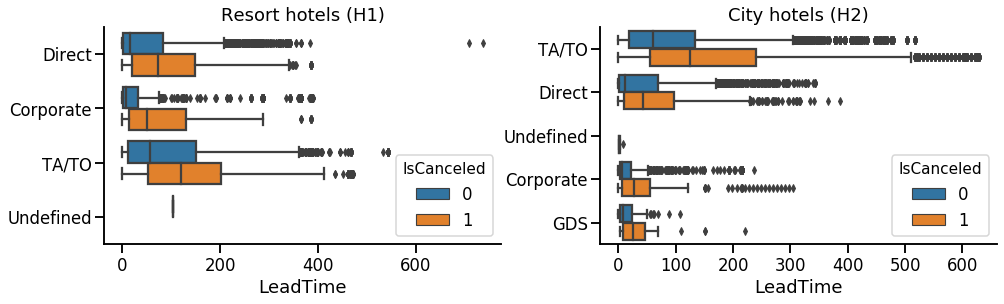

In [13]:
f, ax = plt.subplots(figsize = (16, 4), ncols = 2)
plt.subplots_adjust(wspace = .25)

sns.boxplot(
    data = df_h1,
    x = 'LeadTime',
    y = 'DistributionChannel',
    hue = 'IsCanceled',
    orient = 'h',
#     palette = 'Set1',
    ax = ax[0]
)
ax[0].set_title('Resort hotels (H1)')
ax[0].set_ylabel('')


sns.boxplot(
    data = df_h2,
    x = 'LeadTime',
    y = 'DistributionChannel',
    hue = 'IsCanceled',
    orient = 'h',
#     palette = 'Set1',
#     showfliers = False,
    ax = ax[1]
)

ax[1].set_title('City hotels (H2)')
ax[1].set_ylabel('')
sns.despine();

#### ADR, LeadTime, DaysInWaitingList by distribution channel and market segment

In [14]:
df_h1.groupby(['DistributionChannel','MarketSegment']).agg({
    'ADR': ['median','mean','count'],
    'LeadTime': ['median','mean','count'],
    'DaysInWaitingList': ['median','mean','count']
})

ADR                    LeadTime  \
                                    median        mean  count   median   
DistributionChannel MarketSegment                                        
Corporate           Complementary    0.000    2.620000     20     11.5   
                    Corporate       42.000   50.667811   2152      6.0   
                    Direct          57.600   59.160357     84      6.0   
                    Groups          52.500   59.498016    988    124.0   
                    Offline TA/TO   43.500   44.178571     14     17.0   
                    Online TA       57.750   63.959091     11      2.0   
Direct              Complementary    0.000    3.575180    139      8.0   
                    Corporate       58.000   61.602845    116      3.5   
                    Direct          94.845  112.427622   6228     13.0   
                    Groups          66.000   72.874185   1295    131.0   
                    Offline TA/TO   64.000   79.263000     10     35.5   
                    Online TA       71.000   99.666753     77     11.0   
TA/TO               Complementary    0.000    4.423571     42      5.0   
                    Corporate       45.000   70.154390     41      6.0   
                    Direct          92.000  110.153900    200      2.0   
                    Groups          68.000   66.036693   3553    168.0   
                    Offline TA/TO   64.900   74.713695   7448    109.0   
                    Online TA       95.000  113.523414  17641     55.0   
Undefined           Direct         112.700  112.700000      1    103.0   

                                                     DaysInWaitingList  \
                                         mean  count            median   
DistributionChannel MarketSegment                                        
Corporate           Complementary   21.750000     20                 0   
                    Corporate       17.391264   2152                 0   
                    Direct          16.023810     84                 0   
                    Groups         160.264170    988                 0   
                    Offline TA/TO   17.285714     14                 0   
                    Online TA       27.363636     11                 0   
Direct              Complementary   18.510791    139                 0   
                    Corporate       20.879310    116                 0   
                    Direct          48.909762   6228                 0   
                    Groups         153.406178   1295                 0   
                    Offline TA/TO   65.100000     10                 0   
                    Online TA       61.311688     77                 0   
TA/TO               Complementary   24.166667     42                 0   
                    Corporate       22.536585     41                 0   
                    Direct          47.725000    200                 0   
                    Groups         174.178159   3553                 0   
                    Offline TA/TO  120.720730   7448                 0   
                    Online TA       83.401678  17641                 0   
Undefined           Direct         103.000000      1                 0   

                                                    
                                       mean  count  
DistributionChannel MarketSegment                   
Corporate           Complementary  0.200000     20  
                    Corporate      0.088755   2152  
                    Direct         1.452381     84  
                    Groups         0.392713    988  
                    Offline TA/TO  0.000000     14  
                    Online TA      0.000000     11  
Direct              Complementary  0.000000    139  
                    Corporate      0.000000    116  
                    Direct         0.051060   6228  
                    Groups         6.698842   1295  
                    Offline TA/TO  0.000000     10  
                    Online TA      0.00

In [15]:
df_h2.groupby(['DistributionChannel','MarketSegment']).agg({
    'ADR': ['median','mean','count'],
    'LeadTime': ['median','mean','count'],
    'DaysInWaitingList': ['median','mean','count']
})

ADR                    LeadTime  \
                                   median        mean  count   median   
DistributionChannel MarketSegment                                       
Corporate           Aviation        95.00  100.346608    227      3.0   
                    Complementary    0.00    0.028986     69      1.0   
                    Corporate       77.00   81.817796   2636      8.0   
                    Direct         110.50   92.333333      6      6.5   
                    Groups          90.00   95.512542    240     87.0   
                    Offline TA/TO  120.00  116.558081    198     56.0   
                    Online TA      120.00  115.981250     32      2.0   
Direct              Complementary    0.00    1.981922    437      2.0   
                    Corporate       80.00   86.930357     56      1.0   
                    Direct         111.25  119.537227   6048     19.0   
                    Groups          85.00   92.542034    177     92.0   
                    Offline TA/TO   82.50   74.916667      6      4.5   
                    Online TA      105.50  102.790714     56      1.0   
GDS                 Direct         114.00  114.000000      1      0.0   
                    Offline TA/TO  116.00  118.374000     45      6.0   
                    Online TA      115.00  121.266327    147     14.0   
TA/TO               Aviation        93.00   95.500000     10      4.0   
                    Complementary    0.00   15.036944     36      2.5   
                    Corporate       85.00   94.069558    294     64.0   
                    Direct         114.00  117.528378     37      1.0   
                    Groups          75.00   84.634931  13558    164.0   
                    Offline TA/TO   90.00   92.672562  16498    110.0   
                    Online TA      114.00  118.937571  38512     60.0   
Undefined           Direct          12.00   12.000000      1      1.0   
                    Online TA       76.50   76.500000      1      8.0   
                    Undefined       15.00   15.000000      2      1.5   

                                                     DaysInWaitingList  \
                                         mean  count            median   
DistributionChannel MarketSegment                                        
Corporate           Aviation         4.431718    227                 0   
                    Complementary    5.086957     69                 0   
                    Corporate       20.850910   2636                 0   
                    Direct           6.833333      6                 0   
                    Groups         122.787500    240                 0   
                    Offline TA/TO   80.116162    198                 0   
                    Online TA        2.562500     32                 0   
Direct              Complementary   10.080092    437                 0   
                    Corporate        3.642857     56                 0   
                    Direct          51.652447   6048                 0   
                    Groups          87.135593    177                 0   
                    Offline TA/TO   15.166667      6                 0   
                    Online TA       13.500000     56                 0   
GDS                 Direct           0.000000      1                 0   
                    Offline TA/TO   13.444444     45                 0   
                    Online TA       23.081633    147                 0   
TA/TO               Aviation         4.700000     10                 0   
                    Complementary   30.361111     36                 0   
                    Corporate       72.163265    294                 0   
                    Direct          13.081081     37                 0   
                    Groups         197.918203  13558                 0   
                    Offline TA/TO  142.628985  16498                 0   
                    Online TA       83.271941  38512                 0

### Correlation of numeric values

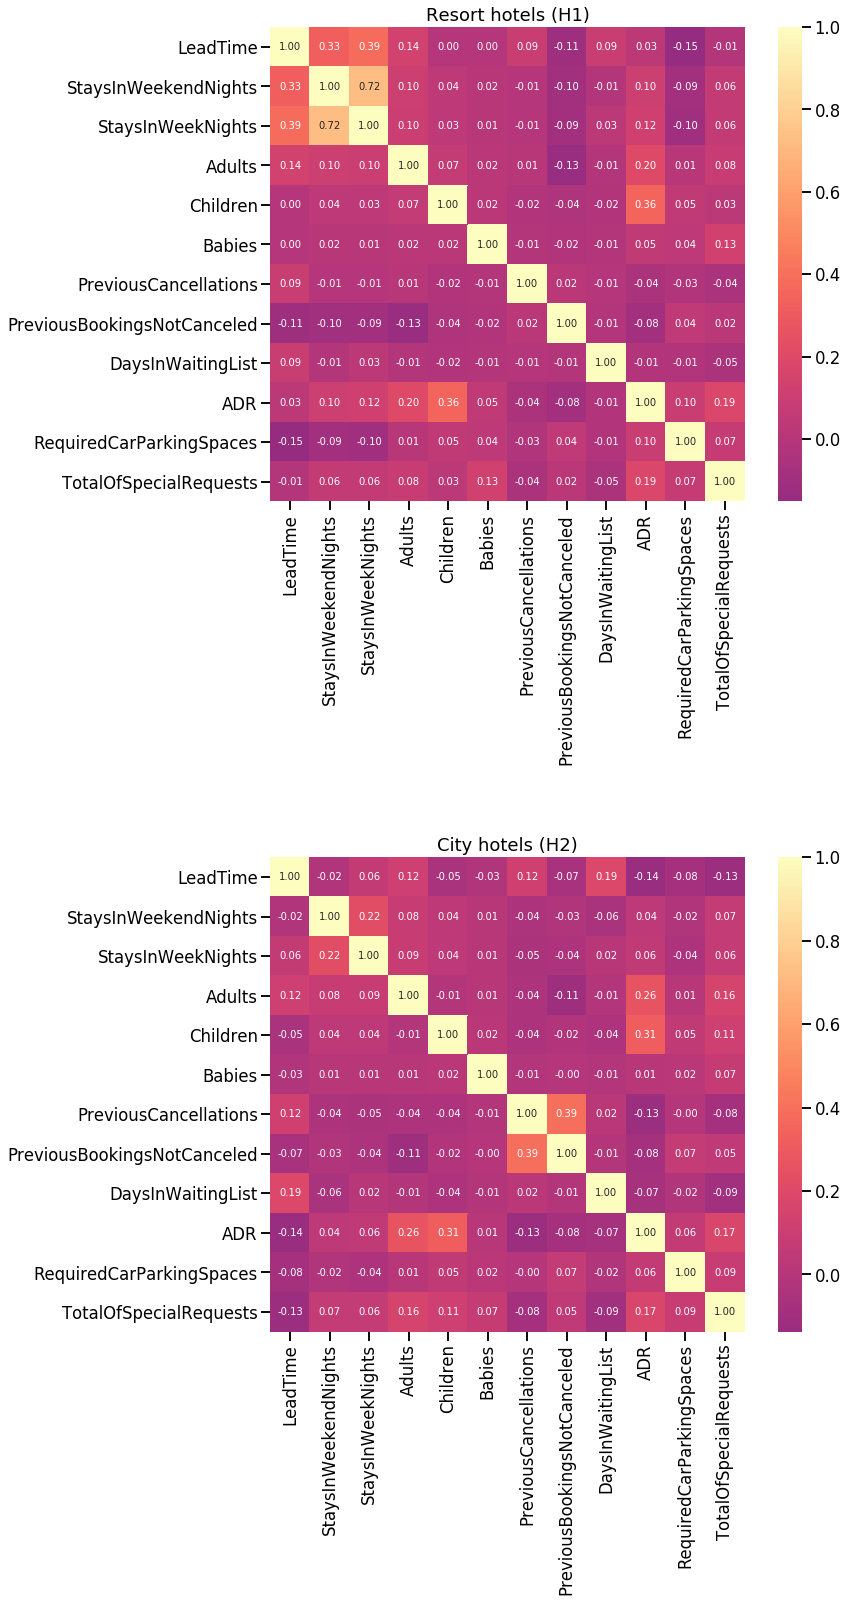

In [16]:
excluded_cols = [
    'IsCanceled','ArrivalDateYear','ArrivalDateWeekNumber',
    'ArrivalDateDayOfMonth','IsRepeatedGuest','BookingChanges'
]
selected_cols = df_h1._get_numeric_data().columns.drop(labels = excluded_cols)

f, ax = plt.subplots(figsize = (12, 24), nrows = 2)
plt.subplots_adjust(hspace = .75)

## H1
sns.heatmap(
    df_h1[selected_cols].corr(),
    center = 0,
    square = True,
    annot = True,
    fmt = '.2f',
    annot_kws = {'size': 10},
    cmap = 'magma',
    ax = ax[0]
);
ax[0].set_title("Resort hotels (H1)")

## H2
sns.heatmap(
    df_h2[selected_cols].corr(),
    center = 0,
    square = True,
    annot = True,
    fmt = '.2f',
    annot_kws = {'size': 10},
    cmap = 'magma',
    ax = ax[1]
);
ax[1].set_title("City hotels (H2)");

### Distribution of numeric values

Resort hotels (H1)


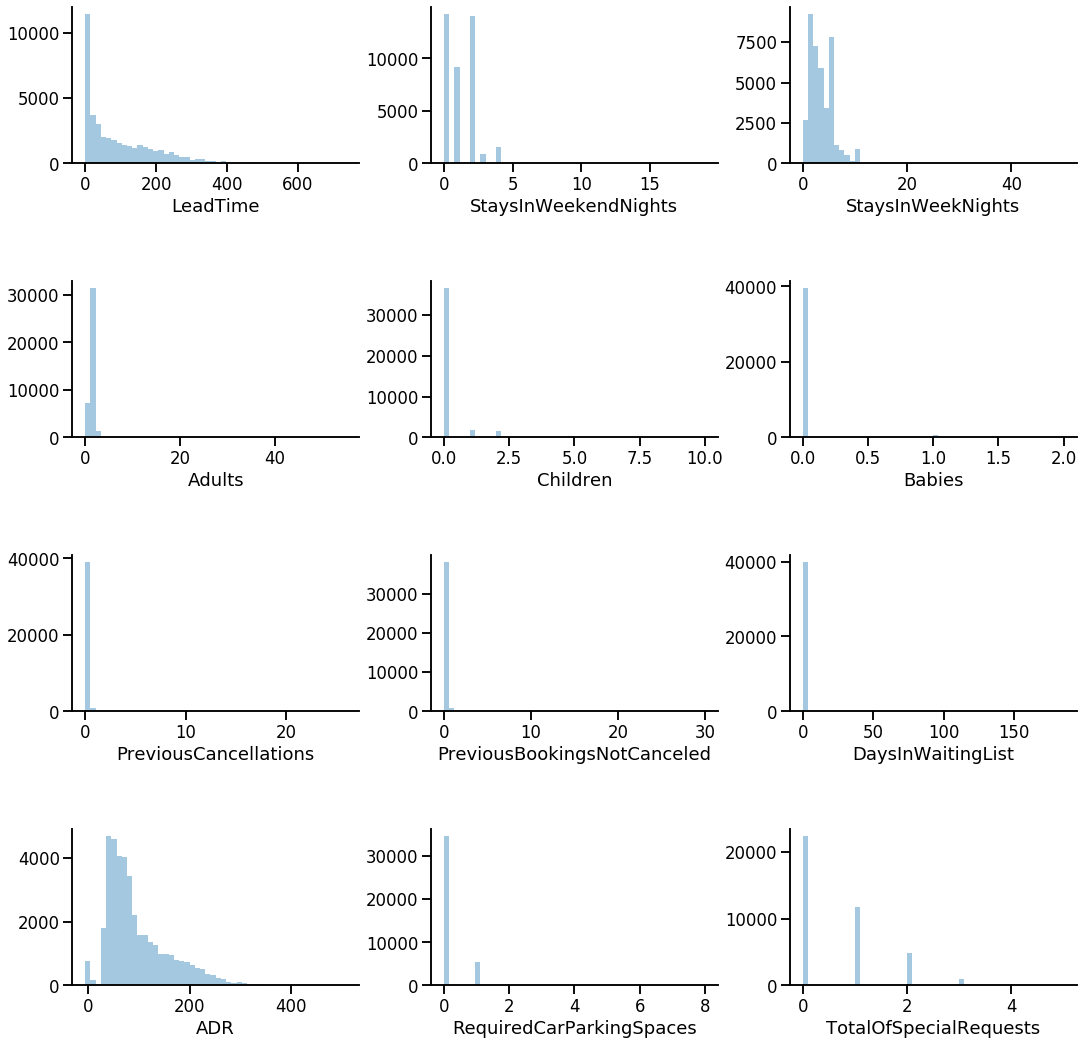

In [17]:
## H1
excluded_cols = [
    'IsCanceled','ArrivalDateYear','ArrivalDateWeekNumber',
    'ArrivalDateDayOfMonth','IsRepeatedGuest','BookingChanges'
]
selected_cols = df_h1._get_numeric_data().columns.drop(labels = excluded_cols)

print("Resort hotels (H1)")

f, ax = plt.subplots(figsize = (18, 18), ncols = 3, nrows = 4)
plt.subplots_adjust(wspace = .25, hspace = .75)

i = 0
j = 0
for col in selected_cols:
    sns.distplot(
        df_h1[col],
        kde = False,
        ax = ax[i][j]
    )
    
    if j == 2:
        i += 1
        j = 0
    else:
        j += 1
        
sns.despine();

City hotels (H2)


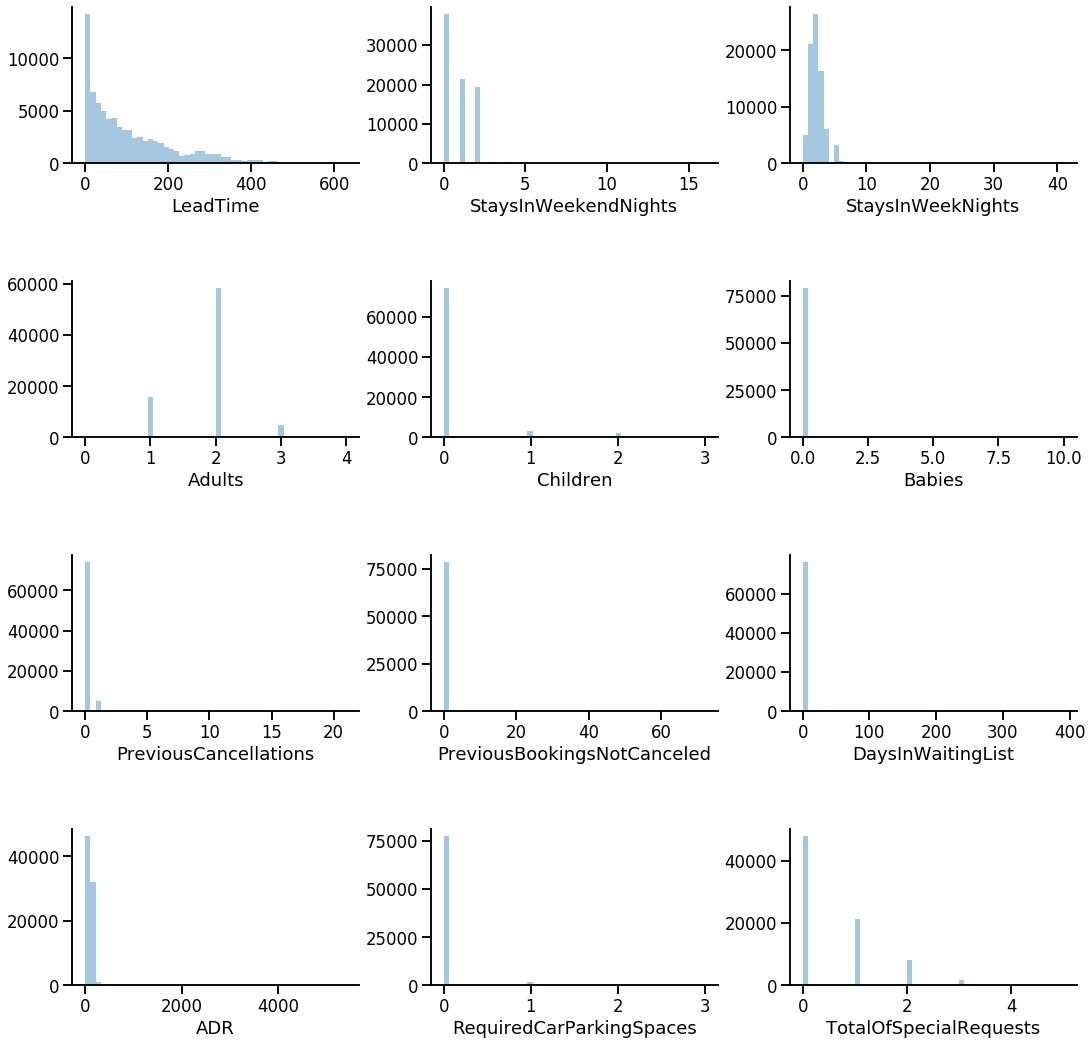

In [18]:
## H2
excluded_cols = [
    'IsCanceled','ArrivalDateYear','ArrivalDateWeekNumber',
    'ArrivalDateDayOfMonth','IsRepeatedGuest','BookingChanges'
]
selected_cols = df_h2._get_numeric_data().columns.drop(labels = excluded_cols)

print("City hotels (H2)")

f, ax = plt.subplots(figsize = (18, 18), ncols = 3, nrows = 4)
plt.subplots_adjust(wspace = .25, hspace = .75)

i = 0
j = 0
for col in selected_cols:
    sns.distplot(
        df_h2[col],
        kde = False,
        ax = ax[i][j]
    )
    
    if j == 2:
        i += 1
        j = 0
    else:
        j += 1
        
sns.despine();

## 2.4. Data Quality Assessment

### 2.4.1. Inconsistent coding scheme

At a glance, there is no inconsistent coding scheme in both datasets. However, actually the Undefined Meal value refers to the same meaning of SC (refer to the metadata explanation). We'll sort them out on the Data Cleaning part.

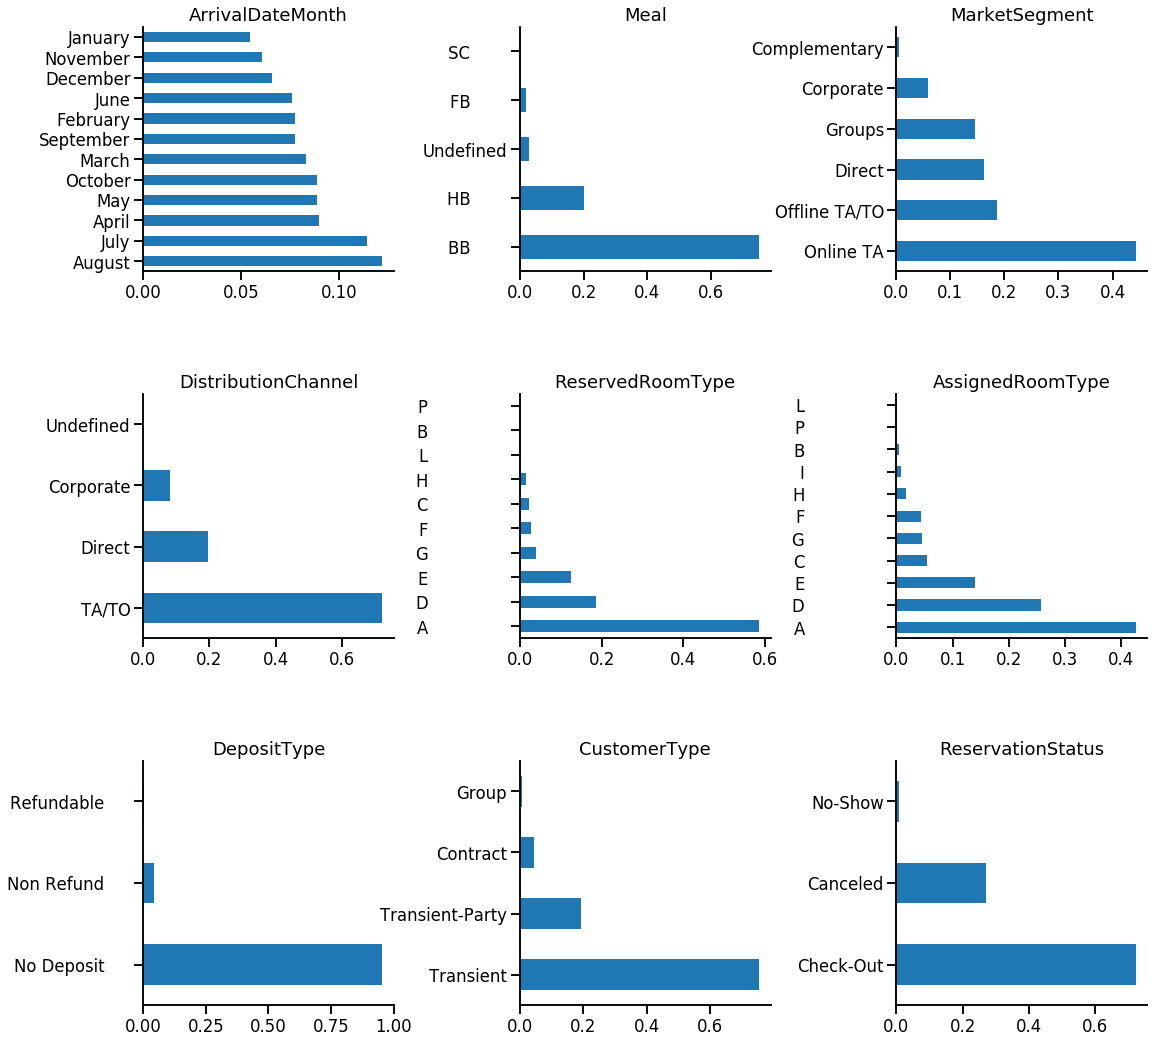

In [19]:
numeric_cols = df_h1._get_numeric_data().columns
nonnumeric_cols_flag = ~df_h1.columns.isin(numeric_cols)
## too many unique values
excluded_cols = ['Agent','Company','ReservationStatusDate','Country']
mask_included_cols = ~df_h1.columns.isin(excluded_cols)
nonnumeric_cols = df_h1.columns[nonnumeric_cols_flag & mask_included_cols]

f, ax = plt.subplots(figsize = (18, 18), ncols = 3, nrows = 3)
plt.subplots_adjust(wspace = .5, hspace = .5)
i = 0
j = 0

for col in nonnumeric_cols:    
    df_h1[col].value_counts(True).plot.barh(ax = ax[i][j]);
    ax[i][j].set_title(col)
    
    if j == 2:
        i += 1
        j = 0
    else:
        j += 1

sns.despine();

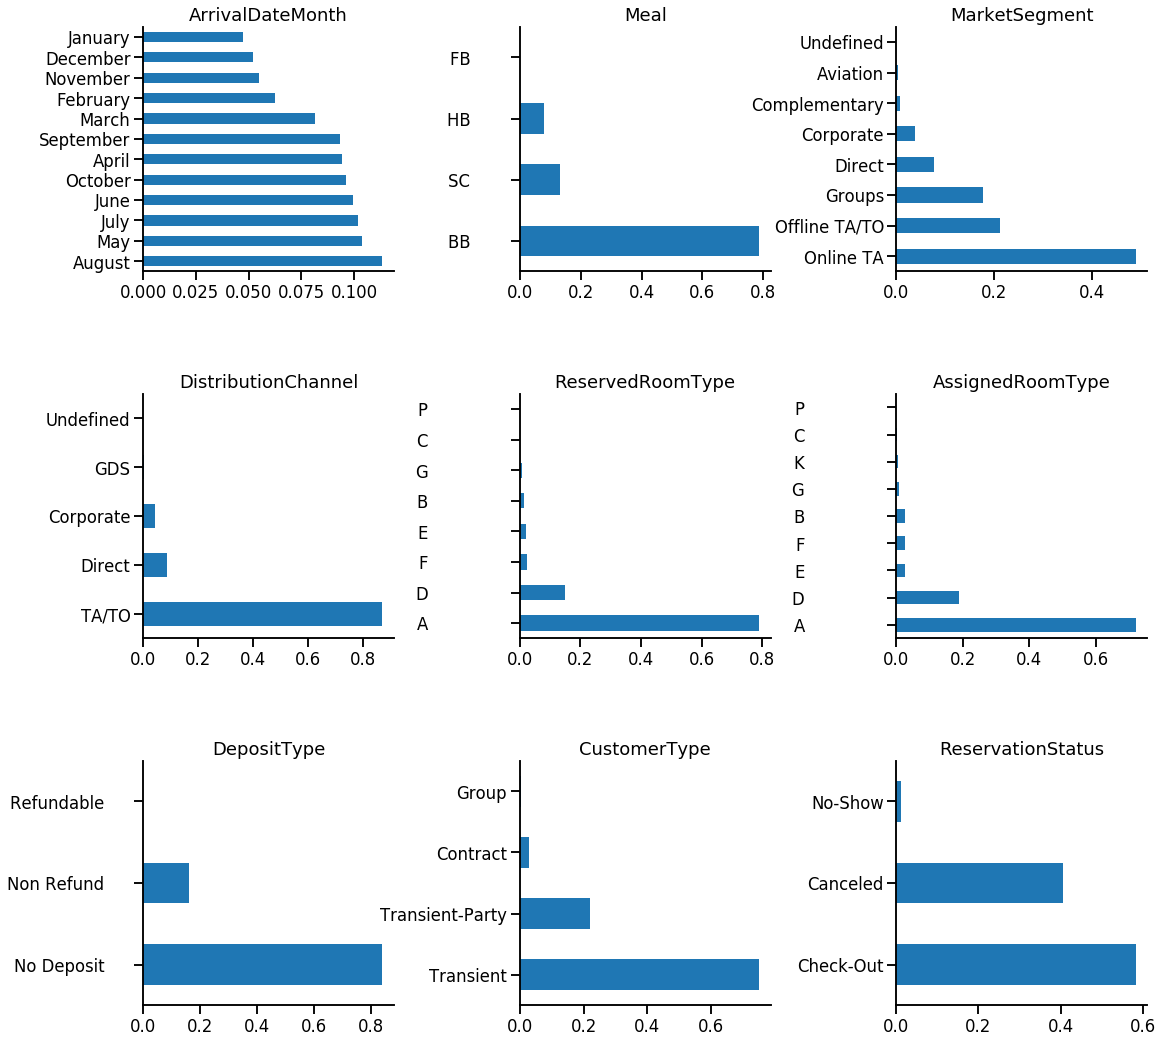

In [20]:
f, ax = plt.subplots(figsize = (18, 18), ncols = 3, nrows = 3)
plt.subplots_adjust(wspace = .5, hspace = .5)
i = 0
j = 0

for col in nonnumeric_cols:    
    df_h2[col].value_counts(True).plot.barh(ax = ax[i][j]);
    ax[i][j].set_title(col)
    
    if j == 2:
        i += 1
        j = 0
    else:
        j += 1

sns.despine();

### 2.4.2. Data error: extreme values and outliers

Assumption: outliers if values are:

- $< Q1 - 1.5 * IQR$, or 
- $> Q3 + 1.5 * IQR$

In [21]:
def check_outliers(series):
    """
    Return number of outliers in the series.
    Outliers: if < Q1 - 1.5*IQR or > Q3 + 1.5*IQR
    """
    q1, q3 = np.percentile(series, q=[25, 75])
    iqr = q3 - q1
    lower_threshold = q1 - (1.5 * iqr)
    upper_threshold = q3 + (1.5 * iqr)
    conditions = [
        (series < lower_threshold) | (series > upper_threshold)
    ]
    choice = [1]
    outliers_flag = np.select(conditions, choice, default = 0)
    return sum(outliers_flag)

In [22]:
numeric_cols = df_h1._get_numeric_data().columns
excluded_cols = [
    'IsCanceled','ArrivalDateYear','ArrivalDateWeekNumber',
    'ArrivalDateDayOfMonth','IsRepeatedGuest'
]
selected_cols = numeric_cols.drop(labels = excluded_cols)

print("Number of outliers in H1")
print("------------------------")
h1_outliers = pd.DataFrame(
    data = {
        'colnames': [], 
        'outliers_count': [],
        'outliers_pct': []
    }
)

for col in selected_cols:
    outlier_count = check_outliers(df_h1[col])
    new_df = pd.DataFrame(data = {
        'colnames': col, 
        'outliers_count': outlier_count, 
        'outliers_pct': outlier_count / df_h1.shape[0]
    }, index = [0])
    h1_outliers = pd.concat([h1_outliers, new_df])
    
h1_outliers.reset_index().drop(labels = ['index'], axis = 1).style.format({
    'outliers_count': '{:,.0f}',
    'outliers_pct': '{:,.2%}'
})

Number of outliers in H1
------------------------


,colnames,outliers_count,outliers_pct
0,LeadTime,431,1.08%
1,StaysInWeekendNights,183,0.46%
2,StaysInWeekNights,232,0.58%
3,Adults,"8,635",21.56%
4,Children,"3,484",8.70%
5,Babies,548,1.37%
6,PreviousCancellations,"1,095",2.73%
7,PreviousBookingsNotCanceled,"2,032",5.07%
8,BookingChanges,"7,808",19.49%
9,DaysInWaitingList,255,0.64%


In [23]:
numeric_cols = df_h2._get_numeric_data().columns
excluded_cols = [
    'IsCanceled','ArrivalDateYear','ArrivalDateWeekNumber',
    'ArrivalDateDayOfMonth','IsRepeatedGuest'
]
selected_cols = numeric_cols.drop(labels = excluded_cols)

print("Number of outliers in H2")
print("------------------------")
h2_outliers = pd.DataFrame(
    data = {
        'colnames': [], 
        'outliers_count': [],
        'outliers_pct': []
    }
)

for col in selected_cols:
    outlier_count = check_outliers(df_h2[col])
    new_df = pd.DataFrame(data = {
        'colnames': col, 
        'outliers_count': outlier_count, 
        'outliers_pct': outlier_count / df_h2.shape[0]
    }, index = [0])
    h2_outliers = pd.concat([h2_outliers, new_df])
    
h2_outliers.reset_index().drop(labels = ['index'], axis = 1).style.format({
    'outliers_count': '{:,.0f}',
    'outliers_pct': '{:,.2%}'
})

Number of outliers in H2
------------------------


,colnames,outliers_count,outliers_pct
0,LeadTime,"2,576",3.25%
1,StaysInWeekendNights,82,0.10%
2,StaysInWeekNights,719,0.91%
3,Adults,"21,075",26.57%
4,Children,0,0.00%
5,Babies,369,0.47%
6,PreviousCancellations,"5,389",6.79%
7,PreviousBookingsNotCanceled,"1,588",2.00%
8,BookingChanges,"10,268",12.94%
9,DaysInWaitingList,"3,443",4.34%


### 2.4.3. Missing values

In [24]:
df_h1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40060 entries, 0 to 40059
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   40060 non-null  int64  
 1   LeadTime                     40060 non-null  int64  
 2   ArrivalDateYear              40060 non-null  int64  
 3   ArrivalDateMonth             40060 non-null  object 
 4   ArrivalDateWeekNumber        40060 non-null  int64  
 5   ArrivalDateDayOfMonth        40060 non-null  int64  
 6   StaysInWeekendNights         40060 non-null  int64  
 7   StaysInWeekNights            40060 non-null  int64  
 8   Adults                       40060 non-null  int64  
 9   Children                     40060 non-null  int64  
 10  Babies                       40060 non-null  int64  
 11  Meal                         40060 non-null  object 
 12  Country                      39596 non-null  object 
 13  MarketSegment   

In [25]:
df_h2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79330 entries, 0 to 79329
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   IsCanceled                   79330 non-null  int64  
 1   LeadTime                     79330 non-null  int64  
 2   ArrivalDateYear              79330 non-null  int64  
 3   ArrivalDateMonth             79330 non-null  object 
 4   ArrivalDateWeekNumber        79330 non-null  int64  
 5   ArrivalDateDayOfMonth        79330 non-null  int64  
 6   StaysInWeekendNights         79330 non-null  int64  
 7   StaysInWeekNights            79330 non-null  int64  
 8   Adults                       79330 non-null  int64  
 9   Children                     79326 non-null  float64
 10  Babies                       79330 non-null  int64  
 11  Meal                         79330 non-null  object 
 12  Country                      79306 non-null  object 
 13  MarketSegment   